# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

### Respuestas:

1. El conjuto de datos recopila informacion de los solicitantes recientes a los que se les otorgó crédito a través del proceso vigente al momento de suscripción de préstamos. El departamento de crédito al consumo de un banco quiere automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito sobre el valor neto de la vivienda. Para hacer esto, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido.

2. La variable TARGET es del tipo binaria e indica si el solicitante devolvio (loan repaid) o no devolvió (defaulted on loan) el préstamo solicitado.

3. Se encuentran:

    1. LOAN    Cantidad de la solicitud de préstamo
    2. MORTDUE Monto adeudado por hipoteca existente
    3. VALUE   Valor de la propiedad actual
    4. YOJ     Años en el trabajo actual
    5. DEROG   Número de informes despectivos importantes
    6. DELINQ  Número de líneas de crédito morosas
    7. CLAGE   Edad de la línea comercial más antigua en meses
    8. NINQ    Número de líneas de crédito recientes
    9. CLNO    Número de líneas de crédito
    8. DEBTINC Relación deuda / ingresos


4. Creemos que pueden ser:

    1. LOAN
    2. MORTDUE
    3. DELINQ
    4. DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Train data
Accuracy 0.8307484828051247, Precision 0.0, Recall 0.0, F1 0.0
Test data
Accuracy 0.8436657681940701, Precision 0.0, Recall 0.0, F1 0.0


/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Test data')

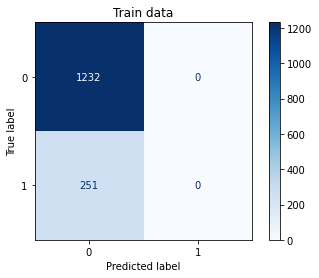

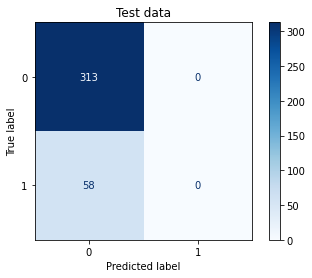

In [63]:
np.random.seed(65793)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

clf = SGDClassifier()
clf.fit(X_train, y_train)
y_clf_train = clf.predict(X_train)
y_clf_test = clf.predict(X_test)

print('Train data')
print(f'Accuracy {accuracy_score(y_train, y_clf_train)}, Precision {precision_score(y_train, y_clf_train)}, Recall {recall_score(y_train, y_clf_train)}, F1 {f1_score(y_train, y_clf_train)}')
disp = plot_confusion_matrix(clf, X_train, y_train,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Train data')

print('Test data')
print(f'Accuracy {accuracy_score(y_test, y_clf_test)}, Precision {precision_score(y_test, y_clf_test)}, Recall {recall_score(y_test, y_clf_test)}, F1 {f1_score(y_test, y_clf_test)}')
disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Test data')

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-4, 1e-4, 1e-3],
    'learning_rate': ['adaptive'],
    'eta0': [1e-2, 1e-3, 1e-4],
    'random_state': [0]
}

clf = SGDClassifier()

cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [96]:
results = pd.DataFrame(cv.cv_results_)
results = results[['rank_test_score', 'params', 'mean_test_score','std_test_score']]

display(results[results.rank_test_score==1].params.values)
display(results.sort_values(by=['rank_test_score']).head())

array([{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1', 'random_state': 0},
       {'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1', 'random_state': 0}],
      dtype=object)

,rank_test_score,params,mean_test_score,std_test_score
40,1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",0.830076,0.002598
13,1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",0.830076,0.002598
76,3,"{'alpha': 0.001, 'eta0': 0.0001, 'learning_rat...",0.829400,0.001629
79,4,"{'alpha': 0.001, 'eta0': 0.0001, 'learning_rat...",0.828729,0.003778
38,5,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",0.828055,0.004088


Train data
Accuracy 0.8347943358057991, Precision 0.6, Recall 0.07171314741035857, F1 0.12811387900355872
Test data
Accuracy 0.8463611859838275, Precision 0.6, Recall 0.05172413793103448, F1 0.09523809523809525


Text(0.5, 1.0, 'Test data')

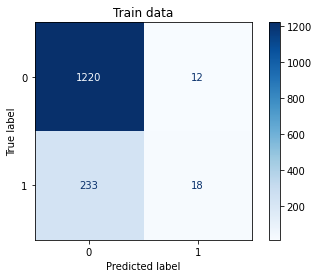

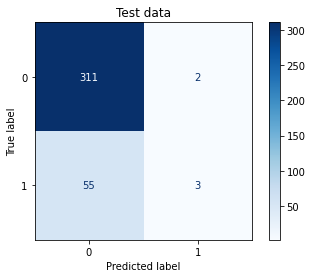

In [97]:
clf = SGDClassifier(**results[results.rank_test_score==1].params.values[0])
clf.fit(X_train, y_train);

y_clf_train = clf.predict(X_train)
y_clf_test = clf.predict(X_test)

print('Train data')
print(f'Accuracy {accuracy_score(y_train, y_clf_train)}, Precision {precision_score(y_train, y_clf_train)}, Recall {recall_score(y_train, y_clf_train)}, F1 {f1_score(y_train, y_clf_train)}')
disp = plot_confusion_matrix(clf, X_train, y_train,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Train data')

print('Test data')
print(f'Accuracy {accuracy_score(y_test, y_clf_test)}, Precision {precision_score(y_test, y_clf_test)}, Recall {recall_score(y_test, y_clf_test)}, F1 {f1_score(y_test, y_clf_test)}')
disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Test data')

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Train data
Accuracy 1.0, Precision 1.0, Recall 1.0, F1 1.0
Test data
Accuracy 0.8814016172506739, Precision 0.6166666666666667, Recall 0.6379310344827587, F1 0.6271186440677966


Text(0.5, 1.0, 'Test data')

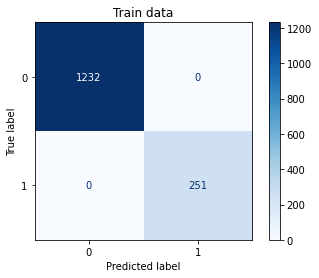

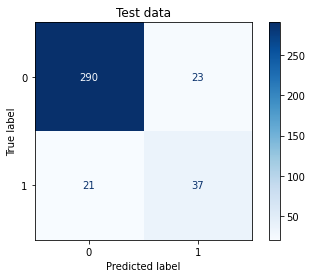

In [98]:
np.random.seed(65793)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_clf_train = clf.predict(X_train)
y_clf_test = clf.predict(X_test)

print('Train data')
print(f'Accuracy {accuracy_score(y_train, y_clf_train)}, Precision {precision_score(y_train, y_clf_train)}, Recall {recall_score(y_train, y_clf_train)}, F1 {f1_score(y_train, y_clf_train)}')
disp = plot_confusion_matrix(clf, X_train, y_train,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Train data')

print('Test data')
print(f'Accuracy {accuracy_score(y_test, y_clf_test)}, Precision {precision_score(y_test, y_clf_test)}, Recall {recall_score(y_test, y_clf_test)}, F1 {f1_score(y_test, y_clf_test)}')
disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Test data')

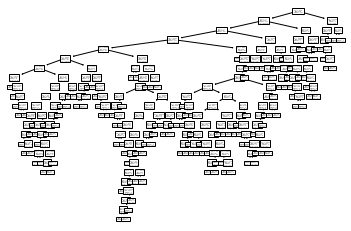

In [99]:
from sklearn.tree import plot_tree

plot_tree(clf);

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 7, 11, 15,19,23],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4],
    'random_state': [0]
}

clf = DecisionTreeClassifier()

cv = GridSearchCV(clf, param_grid, scoring='recall', cv=5)
cv.fit(X_train, y_train);

In [129]:
results = pd.DataFrame(cv.cv_results_)
results = results[['rank_test_score', 'params', 'mean_test_score','std_test_score']]

display(results[results.rank_test_score==1].params.values)
display(results.sort_values(by=['rank_test_score']).head())

array([{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0, 'splitter': 'best'},
       {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0, 'splitter': 'best'}],
      dtype=object)

,rank_test_score,params,mean_test_score,std_test_score
122,1,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.597333,0.089899
134,1,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.597333,0.089899
120,3,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.589569,0.089350
132,3,"{'criterion': 'entropy', 'max_depth': 23, 'min...",0.589569,0.089350
110,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.589490,0.102178


Train data
Accuracy 0.9919082939986514, Precision 0.9760956175298805, Recall 0.9760956175298805, F1 0.9760956175298805
Test data
Accuracy 0.8867924528301887, Precision 0.6333333333333333, Recall 0.6551724137931034, F1 0.6440677966101694


Text(0.5, 1.0, 'Test data')

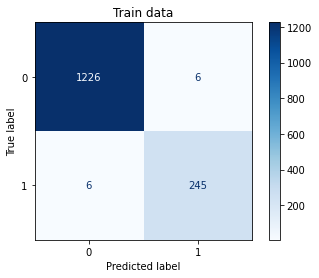

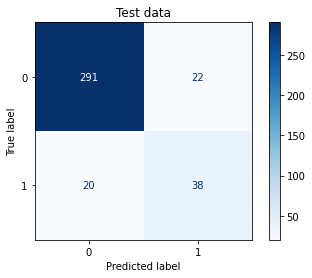

In [130]:
clf = DecisionTreeClassifier(**results[results.rank_test_score==1].params.values[0])
clf.fit(X_train, y_train);

y_clf_train = clf.predict(X_train)
y_clf_test = clf.predict(X_test)

print('Train data')
print(f'Accuracy {accuracy_score(y_train, y_clf_train)}, Precision {precision_score(y_train, y_clf_train)}, Recall {recall_score(y_train, y_clf_train)}, F1 {f1_score(y_train, y_clf_train)}')
disp = plot_confusion_matrix(clf, X_train, y_train,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Train data')

print('Test data')
print(f'Accuracy {accuracy_score(y_test, y_clf_test)}, Precision {precision_score(y_test, y_clf_test)}, Recall {recall_score(y_test, y_clf_test)}, F1 {f1_score(y_test, y_clf_test)}')
disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Test data')